In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DATES
start_date = '2016-09-11'
end_date = '2021-09-11'


In [3]:
# using yahoo finance api to access stock data for inputted time period
amzn = yf.download('AMZN', start= start_date, end= end_date)
aapl = yf.download('AAPL', start= start_date, end= end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# reseting index for easier access of Date
amzn = pd.DataFrame(amzn)
amzn.reset_index(inplace=True)
aapl = pd.DataFrame(aapl)
aapl.reset_index(inplace=True)


In [4]:
#cleaning the data
amzn.drop(['High','Low','Adj Close', 'Volume'],axis=1,inplace=True)
aapl.drop(['High','Low','Adj Close', 'Volume'],axis=1,inplace=True)

In [5]:
#calculating NIght and Day returns for Amazon

amzn['Night_Return %'] = ((amzn['Open'] - amzn['Close'].shift(1))/amzn['Close'].shift(1))
amzn['Night_Return %'] = amzn['Night_Return %'].fillna(0)
amzn['Night_Return %']

amzn['Day_Return %'] = ((amzn['Open'] - amzn['Close'])/amzn['Open'])


In [6]:
# Add columns for the Gap-Up and Gap-Down stragegy - specify the positions for Amazon
amzn["position"] = np.nan
amzn.loc[amzn["Open"] >= amzn["Close"].shift(1), "position"] = 1
amzn.loc[amzn["Open"] < amzn["Close"].shift(1), "position"] = -1


In [7]:
# calculate Gap-Up and Gap-Down strategy's returns for Amazon

# calculate intraday returns using open and close
amzn["rtn"] = (amzn['Close'] - amzn['Open']) / amzn['Open']
amzn['strategy_rtn'] = amzn["rtn"] * amzn["position"]

# calculate cumulative returns
amzn['strategy_cum_rtn'] = (amzn['strategy_rtn'] + 1).cumprod()

In [8]:
# calculate BUY n HOLD returns

amzn["daily_rtn"] = amzn["Close"].pct_change()
amzn['bh_cum_rtn'] = (amzn['daily_rtn'] + 1).cumprod()

Cummulative % NIght Returns in Amazon :  559.6836567225769
Cummulative % Day Returns in Amazon :  8.913273191925919


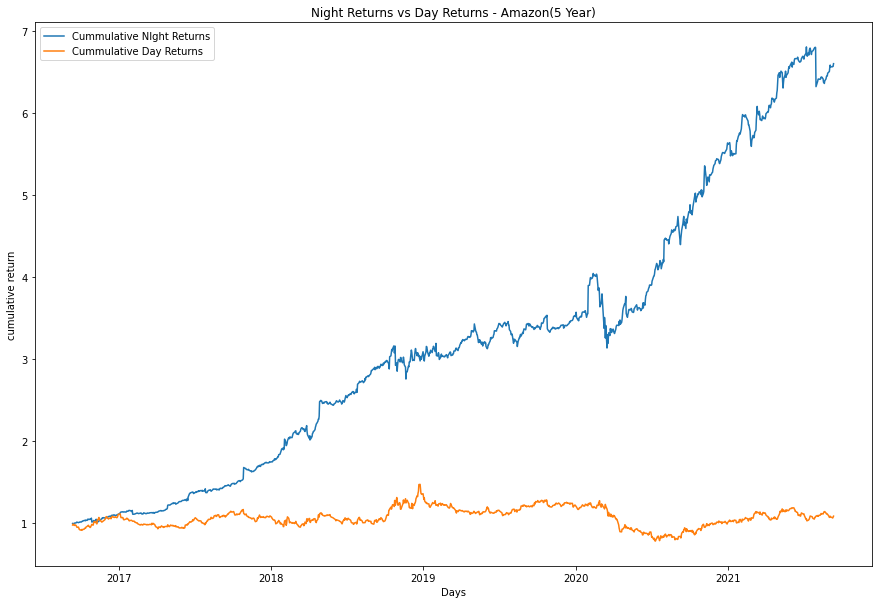

In [10]:
Cumm_night_Amzn = (1+amzn['Night_Return %']).cumprod()
Cumm_day_Amzn = (1+amzn['Day_Return %']).cumprod()
print("Cummulative % NIght Returns in Amazon : " , (Cumm_night_Amzn[len(Cumm_night_Amzn) - 1] - 1) * 100 )
print("Cummulative % Day Returns in Amazon : " , (Cumm_day_Amzn[len(Cumm_day_Amzn) - 1] - 1) * 100 )

#visualization
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(Cumm_night_Amzn)
plt.plot(Cumm_day_Amzn)

plt.title("Night Returns vs Day Returns - Amazon(5 Year)")
plt.ylabel("cumulative return")
plt.xlabel("Days")
ax.legend(["Cummulative NIght Returns","Cummulative Day Returns"])

Cumm_night_Amzn.reset_index(drop=True, inplace=True)


Cummulative % NIght Returns in Amazon :  559.6836567225769
Cummulative % Day Returns in Amazon :  8.913273191925919
Cummulative Gap Open Returns in Amazon :  -49.28432630625726
Cummulative BuyNhold Returns in Amazon :  349.6688157016591


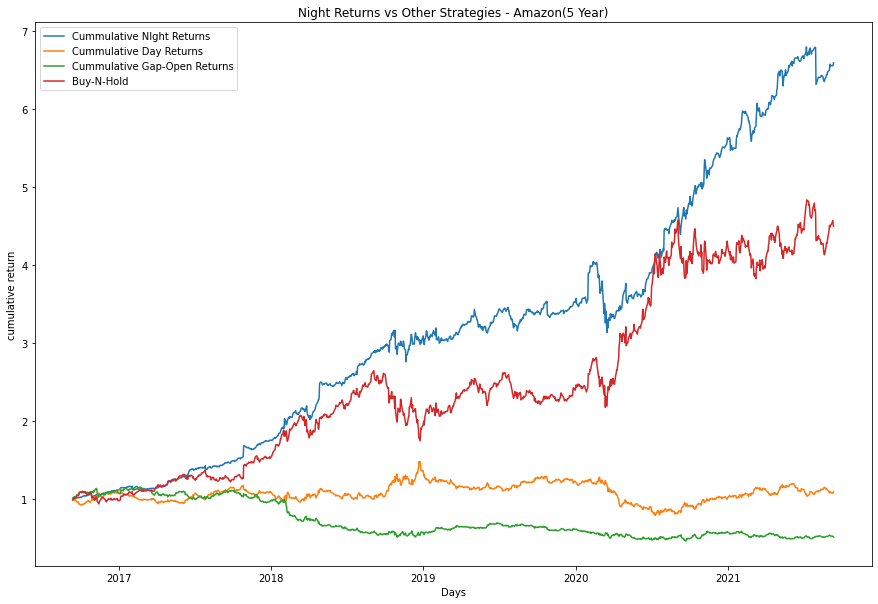

In [11]:
Cumm_night_Amzn = (1+amzn['Night_Return %']).cumprod()
Cumm_day_Amzn = (1+amzn['Day_Return %']).cumprod()
Gap_Open_Strategy = (amzn['strategy_rtn'] + 1).cumprod()
BuyNhold = (amzn['daily_rtn'] + 1).cumprod()

print("Cummulative % NIght Returns in Amazon : " , (Cumm_night_Amzn[len(Cumm_night_Amzn) - 1] - 1) * 100 )
print("Cummulative % Day Returns in Amazon : " , (Cumm_day_Amzn[len(Cumm_day_Amzn) - 1] - 1) * 100 )
print("Cummulative Gap Open Returns in Amazon : " , (Gap_Open_Strategy[len(Gap_Open_Strategy) - 1] - 1) * 100 )
print("Cummulative BuyNhold Returns in Amazon : " , (BuyNhold[len(BuyNhold) - 1] - 1) * 100 )

#visualization
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(Cumm_night_Amzn)
plt.plot(Cumm_day_Amzn)
plt.plot(Gap_Open_Strategy)
plt.plot(BuyNhold)


plt.title("Night Returns vs Other Strategies - Amazon(5 Year)")
plt.ylabel("cumulative return")
plt.xlabel("Days")
ax.legend(["Cummulative NIght Returns","Cummulative Day Returns","Cummulative Gap-Open Returns","Buy-N-Hold"])





Cumm_night_Amzn.reset_index(drop=True, inplace=True)



In [12]:
#calculating NIght and Day returns for Apple

aapl['Night_Return %'] = ((aapl['Open'] - aapl['Close'].shift(1))/aapl['Close'].shift(1))
aapl['Night_Return %'] = aapl['Night_Return %'].fillna(0)
aapl['Night_Return %']

aapl['Day_Return %'] = ((aapl['Open'] - aapl['Close'])/aapl['Open'])


In [13]:
# specify the positions
aapl["position"] = np.nan
aapl.loc[aapl["Open"] > aapl["Close"].shift(1), "position"] = 1
aapl.loc[aapl["Open"] < aapl["Close"].shift(1), "position"] = -1


In [14]:
# calculate Gap-Up and Gap-Down strategy's returns for Apple

# calculate intraday returns using open and close
aapl["rtn"] = (aapl['Close'] - aapl['Open']) / aapl['Open']

# calculate strategy's returns
aapl['strategy_rtn'] = aapl["rtn"] * aapl["position"]
aapl['strategy_cum_rtn'] = (aapl['strategy_rtn'] + 1).cumprod()

# calculate BUY n HOLD returns
aapl["daily_rtn"] = aapl["Close"].pct_change()
aapl['bh_cum_rtn'] = (aapl['daily_rtn'] + 1).cumprod()


Cummulative % NIght Returns in Apple :  101.18452167840655
Cummulative % Day Returns in Apple :  -72.59474629563904


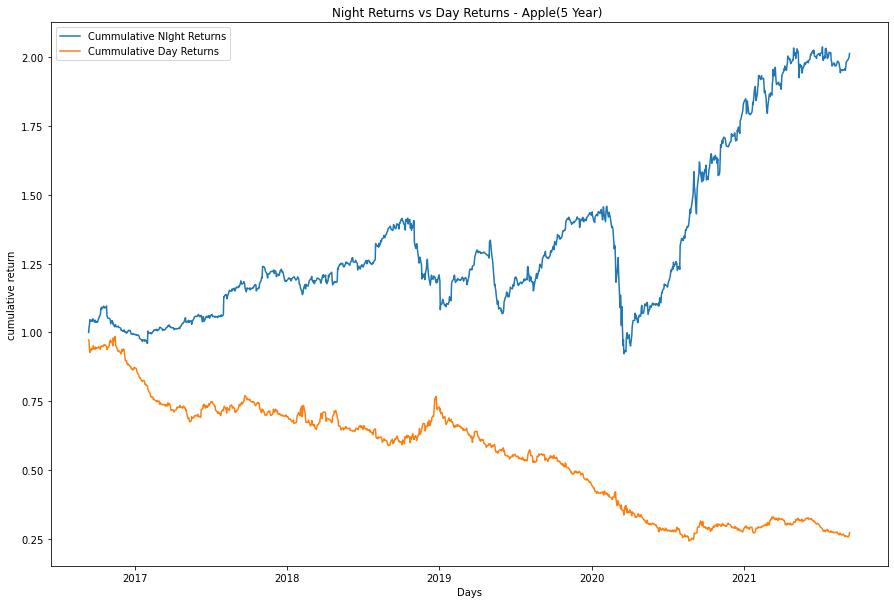

In [17]:
Cumm_night_aapl = (1+aapl['Night_Return %']).cumprod()
Cumm_day_aapl = (1+aapl['Day_Return %']).cumprod()
print("Cummulative % NIght Returns in Apple : " , (Cumm_night_aapl[len(Cumm_night_aapl) - 1] - 1) * 100 )
print("Cummulative % Day Returns in Apple : " , (Cumm_day_aapl[len(Cumm_day_aapl) - 1] - 1) * 100 )

#visualization
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(Cumm_night_aapl)
plt.plot(Cumm_day_aapl)


plt.title("Night Returns vs Day Returns - Apple(5 Year) ")
plt.ylabel("cumulative return")
plt.xlabel("Days")
ax.legend(["Cummulative NIght Returns","Cummulative Day Returns",])

Cumm_night_aapl.reset_index(drop=True, inplace=True)



Cummulative % NIght Returns in Apple :  101.18452167840655
Cummulative % Day Returns in Apple :  -72.59474629563904
Cummulative Gap Open Returns in Apple :  32.17864984703138
Cummulative BuyNhold Returns in Apple :  465.13656210692045


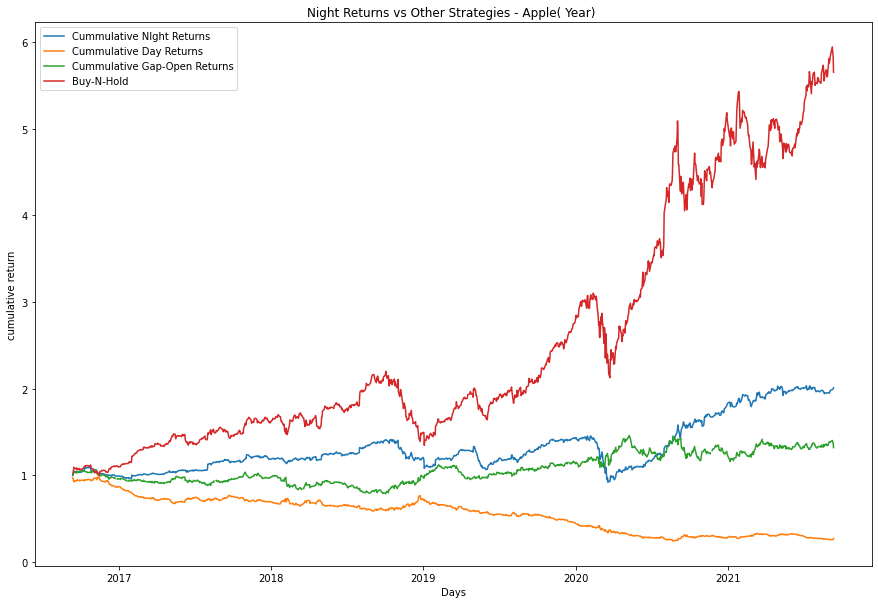

In [18]:
Cumm_night_aapl = (1+aapl['Night_Return %']).cumprod()
Cumm_day_aapl = (1+aapl['Day_Return %']).cumprod()
Gap_Open_Strategy = (aapl['strategy_rtn'] + 1).cumprod()
BuyNhold = (aapl['daily_rtn'] + 1).cumprod()

print("Cummulative % NIght Returns in Apple : " , (Cumm_night_aapl[len(Cumm_night_aapl) - 1] - 1) * 100 )
print("Cummulative % Day Returns in Apple : " , (Cumm_day_aapl[len(Cumm_day_aapl) - 1] - 1) * 100 )
print("Cummulative Gap Open Returns in Apple : " , (Gap_Open_Strategy[len(Gap_Open_Strategy) - 1] - 1) * 100 )
print("Cummulative BuyNhold Returns in Apple : " , (BuyNhold[len(BuyNhold) - 1] - 1) * 100 )

#visualization
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(Cumm_night_aapl)
plt.plot(Cumm_day_aapl)
plt.plot(Gap_Open_Strategy)
plt.plot(BuyNhold)


plt.title("Night Returns vs Other Strategies - Apple( Year) ")
plt.ylabel("cumulative return")
plt.xlabel("Days")
ax.legend(["Cummulative NIght Returns","Cummulative Day Returns","Cummulative Gap-Open Returns","Buy-N-Hold"])





Cumm_night_aapl.reset_index(drop=True, inplace=True)

